In [7]:
!pip install prophet


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd

# Prophet용 데이터프레임 생성
df_prophet = df[['일시', '최대전력(MW)']].rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])  # 날짜형 변환

In [9]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

Importing plotly failed. Interactive plots will not work.
17:14:45 - cmdstanpy - INFO - Chain [1] start processing
17:14:48 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

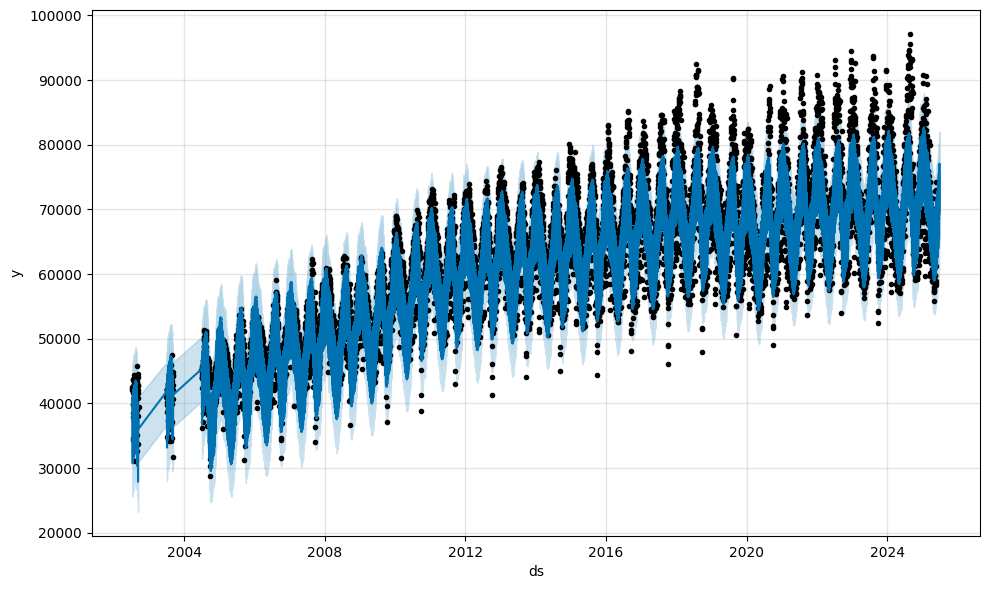

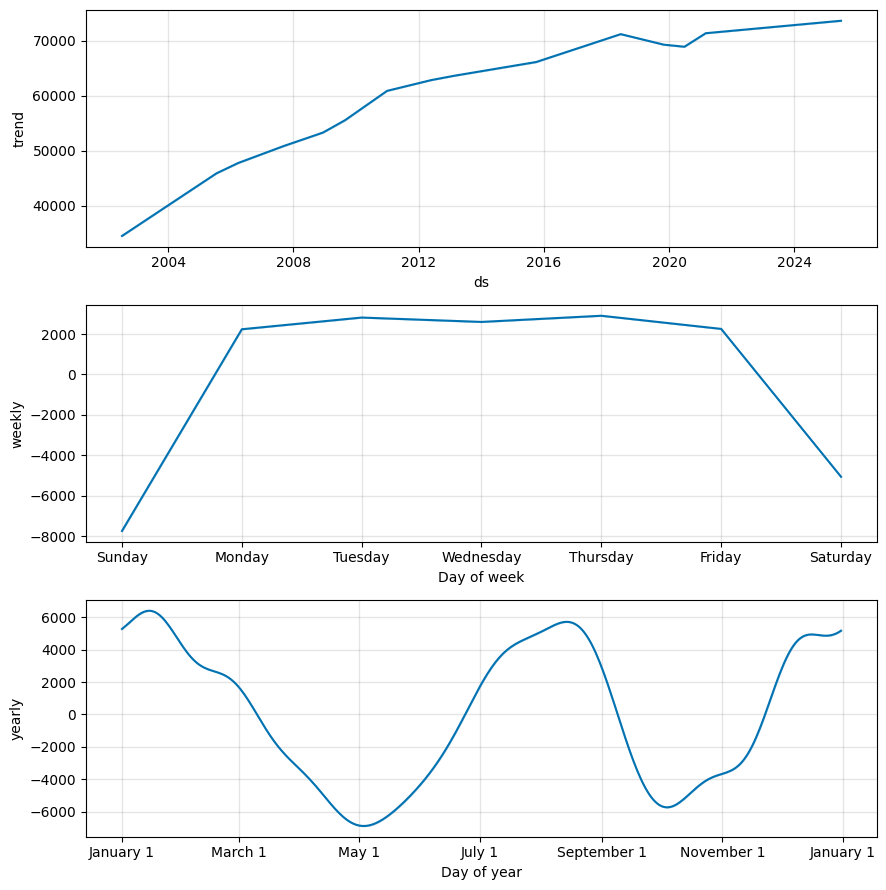

In [11]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [12]:
   from prophet import Prophet
   import pandas as pd

   df = pd.read_csv('cleaned_power_data.csv')
   df_prophet = df[['일시', '최대전력(MW)']].rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
   df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

   model = Prophet()
   model.fit(df_prophet)
   future = model.make_future_dataframe(periods=30)
   forecast = model.predict(future)

17:27:02 - cmdstanpy - INFO - Chain [1] start processing
17:27:04 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
   forecast.to_csv('forecast.csv', index=False)

In [14]:
from sklearn.metrics import r2_score

# 학습 데이터 구간만 추출 (실제값이 있는 부분)
df_compare = forecast.merge(df_prophet, on='ds', how='inner')

# 실제값: df_compare['y'], 예측값: df_compare['yhat']
r2 = r2_score(df_compare['y'], df_compare['yhat'])
print(f"R² (결정계수): {r2:.4f}")

R² (결정계수): 0.8889


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 실제값과 예측값이 있는 데이터프레임 만들기
df_compare = forecast.merge(df_prophet, on='ds', how='inner')

# RMSE 계산
rmse = np.sqrt(mean_squared_error(df_compare['y'], df_compare['yhat']))
print(f"RMSE (평균제곱근오차): {rmse:.2f}")

RMSE (평균제곱근오차): 3895.52


In [17]:
from sklearn.metrics import mean_absolute_error

# 실제값과 예측값이 있는 데이터프레임에서 MAE 계산
mae = mean_absolute_error(df_compare['y'], df_compare['yhat'])
print(f"MAE (평균절대오차): {mae:.2f}")

MAE (평균절대오차): 2765.20


In [18]:
from prophet import Prophet

# 외부 변수 포함 데이터 준비
df_ex = df[['일시', '최대전력(MW)', '평균기온(°C)_norm', '최저기온(°C)_norm', '최고기온(°C)_norm']].copy()
df_ex = df_ex.rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
df_ex['ds'] = pd.to_datetime(df_ex['ds'])

# Prophet 모델 생성 및 외부 변수 추가
m = Prophet()
m.add_regressor('평균기온(°C)_norm')
m.add_regressor('최저기온(°C)_norm')
m.add_regressor('최고기온(°C)_norm')

# 모델 학습
m.fit(df_ex)

# 계수(중요도) 확인
coefs = m.params['beta'][0]
regressors = ['평균기온(°C)_norm', '최저기온(°C)_norm', '최고기온(°C)_norm']
for reg, coef in zip(regressors, coefs):
    print(f"{reg}: {coef:.4f}")

17:56:42 - cmdstanpy - INFO - Chain [1] start processing
17:56:46 - cmdstanpy - INFO - Chain [1] done processing


평균기온(°C)_norm: -0.0168
최저기온(°C)_norm: -0.0032
최고기온(°C)_norm: 0.0391


In [19]:
from prophet import Prophet
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('cleaned_power_data.csv')

# 사용할 feature(외부 변수) 리스트
regressors = [
    '평균기온(°C)_norm',
    '최저기온(°C)_norm',
    '최고기온(°C)_norm',
    '일강수량(mm)_norm',
    '평균 풍속(m/s)_norm',
    '최대 풍속(m/s)_norm',
    '평균 상대습도(%)_norm',
    '평균 증기압(hPa)_norm',
    '합계 일조시간(hr)_norm'
]

# Prophet용 데이터 준비
df_ex = df[['일시', '최대전력(MW)'] + regressors].copy()
df_ex = df_ex.rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
df_ex['ds'] = pd.to_datetime(df_ex['ds'])

# Prophet 모델 생성 및 외부 변수 추가
m = Prophet()
for reg in regressors:
    m.add_regressor(reg)

# 모델 학습
m.fit(df_ex)

# feature importance(계수) 확인
coefs = m.params['beta'][0]
for reg, coef in zip(regressors, coefs):
    print(f"{reg}: {coef:.4f}")

18:01:32 - cmdstanpy - INFO - Chain [1] start processing
18:01:37 - cmdstanpy - INFO - Chain [1] done processing


평균기온(°C)_norm: 0.0050
최저기온(°C)_norm: 0.0350
최고기온(°C)_norm: 0.0152
일강수량(mm)_norm: 0.0225
평균 풍속(m/s)_norm: -0.0087
최대 풍속(m/s)_norm: 0.0016
평균 상대습도(%)_norm: -0.0049
평균 증기압(hPa)_norm: -0.0020
합계 일조시간(hr)_norm: 0.0035


In [20]:
from prophet import Prophet
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('cleaned_power_data.csv')

# Prophet용 데이터 준비
df_ex = df[['일시', '최대전력(MW)', '평균기온(°C)_norm']].copy()
df_ex = df_ex.rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
df_ex['ds'] = pd.to_datetime(df_ex['ds'])

# Prophet 모델 생성 및 외부 변수 추가
m = Prophet()
m.add_regressor('평균기온(°C)_norm')
m.fit(df_ex)

18:11:48 - cmdstanpy - INFO - Chain [1] start processing
18:11:51 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
import streamlit as st
import pandas as pd
from prophet import Prophet

# 데이터 불러오기
df = pd.read_csv('cleaned_power_data.csv')
df_ex = df[['일시', '최대전력(MW)', '평균기온(°C)_norm']].copy()
df_ex = df_ex.rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
df_ex['ds'] = pd.to_datetime(df_ex['ds'])

# Prophet 모델 생성 및 외부 변수 추가
m = Prophet()
m.add_regressor('평균기온(°C)_norm')
m.fit(df_ex)

st.title("평균기온 입력 기반 전력수요 예측 대시보드")

# 예측 기간 설정
periods = st.number_input("미래 예측 일수", min_value=1, max_value=60, value=30)

# 미래 평균기온 입력 (동일값 적용)
future_temp = st.number_input("미래 평균기온(정규화 값, 0~1)", min_value=0.0, max_value=1.0, value=0.5, step=0.01)

# future 데이터프레임 생성
future = m.make_future_dataframe(periods=int(periods))
future['평균기온(°C)_norm'] = list(df_ex['평균기온(°C)_norm']) + [future_temp]*int(periods)

# 예측
forecast = m.predict(future)

# 결과 시각화
st.subheader("예측 전력수요 추이")
st.line_chart(forecast.set_index('ds')['yhat'])

# 피크(최대) 전력수요 표시
peak_row = forecast.tail(int(periods)).loc[forecast['yhat'].tail(int(periods)).idxmax()]
st.metric("예측 피크 전력수요 (MW)", f"{peak_row['yhat']:.0f}")
st.write(f"피크 발생 날짜: {peak_row['ds'].date()}")

18:12:08 - cmdstanpy - INFO - Chain [1] start processing
18:12:12 - cmdstanpy - INFO - Chain [1] done processing
2025-06-05 18:12:12.201 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:12:12.594 
  command:

    streamlit run c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-05 18:12:12.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:12:12.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:12:12.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:12:12.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:12:12.597 Thread 

In [22]:
import streamlit as st
import pandas as pd
from prophet import Prophet

# 데이터 불러오기
df = pd.read_csv('cleaned_power_data.csv')
df_ex = df[['일시', '최대전력(MW)', '평균기온(°C)_norm']].copy()
df_ex = df_ex.rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
df_ex['ds'] = pd.to_datetime(df_ex['ds'])

# Prophet 모델 생성 및 외부 변수 추가
m = Prophet()
m.add_regressor('평균기온(°C)_norm')
m.fit(df_ex)

st.title("평균기온 입력 기반 전력수요 예측 대시보드")

# 예측 기간 설정
periods = st.number_input("미래 예측 일수", min_value=1, max_value=60, value=30)

# 미래 평균기온 입력 (동일값 적용)
future_temp = st.number_input("미래 평균기온(정규화 값, 0~1)", min_value=0.0, max_value=1.0, value=0.5, step=0.01)

# future 데이터프레임 생성
future = m.make_future_dataframe(periods=int(periods))
future['평균기온(°C)_norm'] = list(df_ex['평균기온(°C)_norm']) + [future_temp]*int(periods)

# 예측
forecast = m.predict(future)

# 미래 예측 구간만 추출
future_forecast = forecast.tail(int(periods))

# 미래 구간에서 피크(최대) 전력수요 및 날짜 찾기
peak_row = future_forecast.loc[future_forecast['yhat'].idxmax()]

st.subheader("미래 예측 구간 피크 전력수요")
st.metric("예측 피크 전력수요 (MW)", f"{peak_row['yhat']:.0f}")
st.write(f"피크 발생 날짜: {peak_row['ds'].date()}")

# 전체 예측 그래프
st.subheader("전력수요 예측 추이")
st.line_chart(future_forecast.set_index('ds')['yhat'])

18:18:07 - cmdstanpy - INFO - Chain [1] start processing
18:18:11 - cmdstanpy - INFO - Chain [1] done processing
2025-06-05 18:18:11.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:18:11.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:18:11.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:18:11.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:18:11.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:18:11.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:18:11.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-

DeltaGenerator()

In [23]:
def normalize(temp, min_temp, max_temp):
    return (temp - min_temp) / (max_temp - min_temp)

def denormalize(norm_temp, min_temp, max_temp):
    return norm_temp * (max_temp - min_temp) + min_temp

In [24]:
import streamlit as st
import pandas as pd
from prophet import Prophet

# 데이터 불러오기
df = pd.read_csv('cleaned_power_data.csv')
df_ex = df[['일시', '최대전력(MW)', '평균기온(°C)_norm']].copy()
df_ex = df_ex.rename(columns={'일시': 'ds', '최대전력(MW)': 'y'})
df_ex['ds'] = pd.to_datetime(df_ex['ds'])

# 실제 온도(°C) min/max 계산 (정규화용)
# 원본 평균기온(°C) 컬럼이 있다면 아래처럼 사용하세요.
if '평균기온(°C)' in df.columns:
    min_temp = df['평균기온(°C)'].min()
    max_temp = df['평균기온(°C)'].max()
else:
    # 정규화된 값만 있다면, min/max를 직접 입력해야 합니다.
    min_temp = st.number_input("평균기온(°C) 최소값", value=0.0)
    max_temp = st.number_input("평균기온(°C) 최대값", value=30.0)

def normalize(temp, min_temp, max_temp):
    return (temp - min_temp) / (max_temp - min_temp)

# Prophet 모델 생성 및 외부 변수 추가
m = Prophet()
m.add_regressor('평균기온(°C)_norm')
m.fit(df_ex)

st.title("평균기온(°C) 입력 기반 전력수요 예측 대시보드")

# 예측 기간 설정
periods = st.number_input("미래 예측 일수", min_value=1, max_value=60, value=7)

# 날짜별 평균기온(°C) 입력
st.write("미래 예측 구간의 날짜별 평균기온(°C)을 입력하세요.")
future_dates = pd.date_range(df_ex['ds'].max() + pd.Timedelta(days=1), periods=int(periods))
future_temps = []
for d in future_dates:
    temp = st.number_input(f"{d.date()} 평균기온(°C)", min_value=min_temp, max_value=max_temp, value=float((min_temp+max_temp)/2), key=str(d))
    future_temps.append(temp)

# 정규화된 평균기온 값 생성
future_temps_norm = [normalize(t, min_temp, max_temp) for t in future_temps]

# future 데이터프레임 생성
future = m.make_future_dataframe(periods=int(periods))
future['평균기온(°C)_norm'] = list(df_ex['평균기온(°C)_norm']) + future_temps_norm

# 예측
forecast = m.predict(future)

# 미래 예측 구간만 추출
future_forecast = forecast.tail(int(periods))

# 미래 구간에서 피크(최대) 전력수요 및 날짜 찾기
peak_row = future_forecast.loc[future_forecast['yhat'].idxmax()]

st.subheader("미래 예측 구간 피크 전력수요")
st.metric("예측 피크 전력수요 (MW)", f"{peak_row['yhat']:.0f}")
st.write

2025-06-05 18:20:35.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:20:35.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:20:35.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:20:35.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:20:35.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:20:35.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:20:35.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 18:20:35.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

<bound method WriteMixin.write of DeltaGenerator()>